8.841941282883073e-08 22660.65741229501 1.1131344570613422e-08


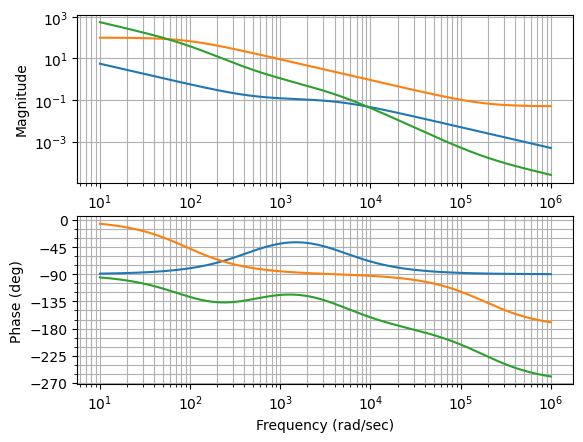

In [7]:
import control as co
import matplotlib.pyplot as plt
import numpy as np

Vg, D, T, L, R, C, Rs, Se = 5, 0.8, 1 / 50e+3, 220e-6, 1e+3, 22e-6, 1, 175e+3
R1, Rb = 180e+3, 20e+3
# R2, C1, C3 = 215e+3, 7.5e-9, 0.1e-9

fp0, fz1, fp1 = 1 * (10 ** 1), 1 * (10 ** 1.9), 1 * (10 ** 2.8)

C1 = 1 / (2 * np.pi * R1 * fp0)
R2 = fp0 * R1 / fz1
C3 = fz1 / (2 * np.pi * R1 * fp0 * fp1)

print(C1, R2, C3)

Xn = (
  (co.tf([R2], [1]) + co.tf([1], [C1, 0]))
  * co.tf([1], [C3, 0])
) / (
  co.tf([R2], [1]) + co.tf([1], [C1, 0])
  + co.tf([1], [C3, 0])
)

d_to_Vo = co.tf(
  [-L * Vg / (R * (1 - D) ** 2), Vg],
  [L * C, L / R, (1 - D) ** 2]
)
d_to_iL = co.tf(
  [C * Vg / (1 - D), 2 * Vg / (R * (1 - D))],
  [L * C, L / R, (1 - D) ** 2]
)

inner_loop = co.feedback(
  co.tf([Vg * T / (2 * L) + Se / (T ** 2)], [1]),
  d_to_iL * co.tf([Rs], 1),
  -1
)

compensation = Xn / R1
Gc = inner_loop * d_to_Vo
loop_gain = Gc * compensation

mag, phase, omega = co.bode(compensation, np.logspace(1, 6, 1000))
mag, phase, omega = co.bode(Gc, np.logspace(1, 6, 1000))
mag, phase, omega = co.bode(loop_gain, np.logspace(1, 6, 1000))
